In [56]:
#from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
whitewine_df = pd.read_csv('/content/winequality-white.csv', delimiter=';')
whitewine_df.columns = whitewine_df.columns.str.strip()
whitewine_df = whitewine_df.rename(columns={'total sulfur dioxide': 'total_SO2', 'free sulfur dioxide': 'free_SO2'})
print(whitewine_df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_SO2  total_SO2  density    pH  sulphates  alcohol  quality  
0      45.0      170.0   1.0010  3.00       0.45      8.8        6  
1      14.0      132.0   0.9940  3.30       0.49      9.5        6  
2      30.0       97.0   0.9951  3.26       0.44     10.1        6  
3      47.0      186.0   0.9956  3.19       0.40      9.9        6  
4      47.0      186.0   0.9956  3.19       0.40      9.9        6  


#Task1: For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)

In [92]:
#Task1

statistics = whitewine_df.describe()
rounded_statistics = statistics.round(2)
rounded_statistics.to_csv('statistics.csv')

print("summary statistics saved to 'statistics.csv'.")

summary statistics saved to 'statistics.csv'.


#Task2: Illustrate the correlation matrix of all features and the target.

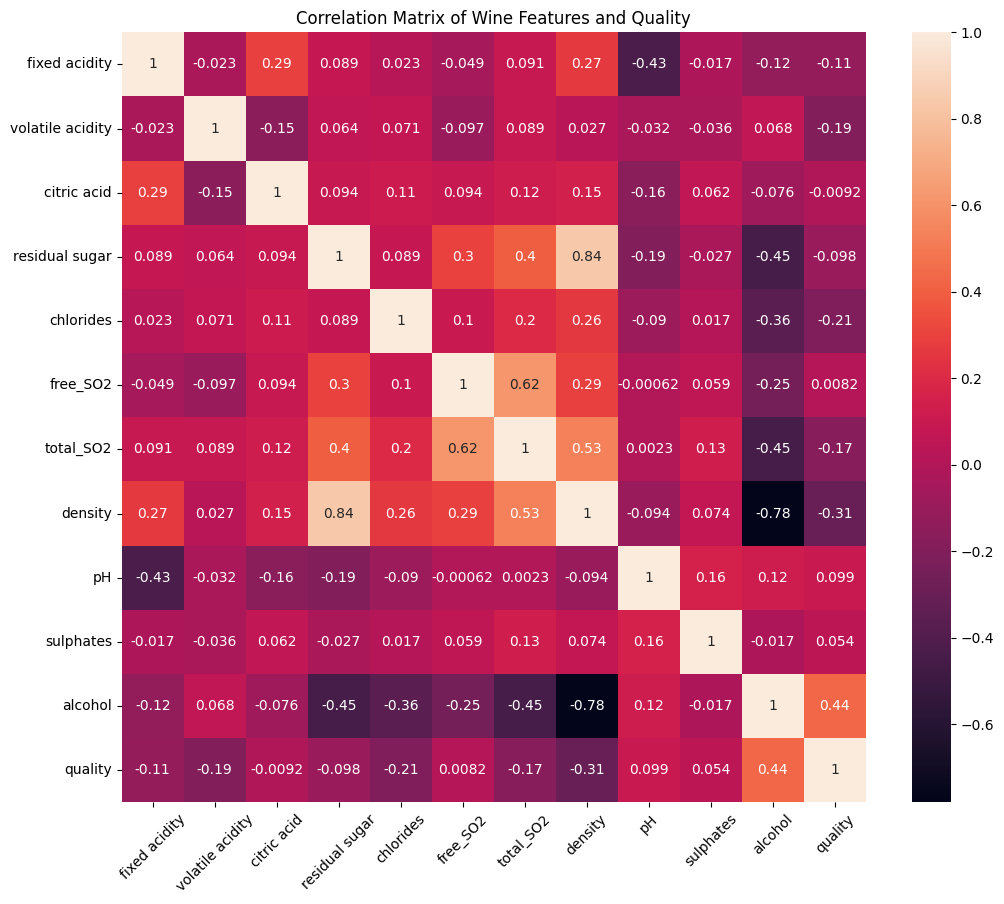

In [20]:
#Task2

corrleation_matrix = whitewine_df.corr()

#setting up matplotlib figure size
plt.figure(figsize=(12, 10))

#heatmap
sns.heatmap(corrleation_matrix, annot=True)

#print(corrleation_matrix)
plt.title('Correlation Matrix of Wine Features and Quality')
plt.xticks(rotation=45)
plt.savefig('correlation_matrix.png')
plt.show()

#Task3: Plot a histogram of the target value (quality).

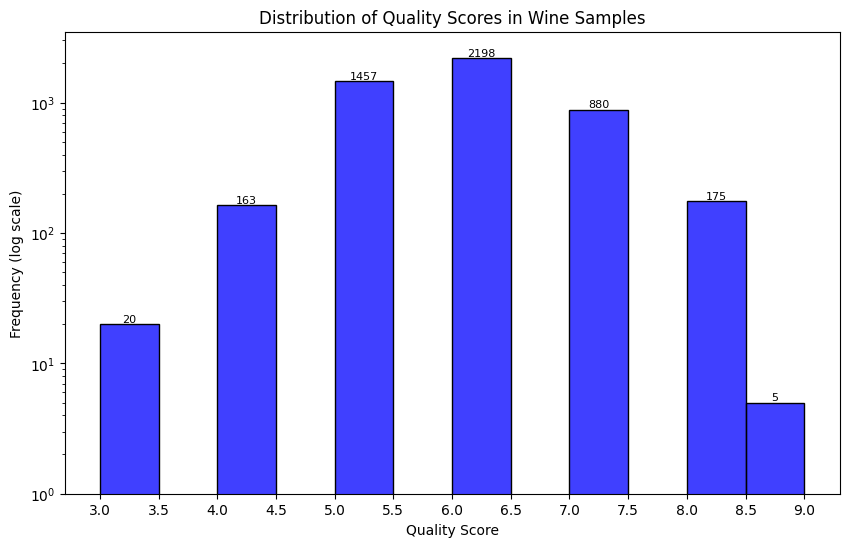

In [50]:
#Task3.

plt.figure(figsize=(10, 6))
plot = sns.histplot(whitewine_df['quality'], color='blue', binwidth=0.5)

plt.xlabel('Quality Score')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Quality Scores in Wine Samples')


plt.xticks(np.arange(whitewine_df['quality'].min(), whitewine_df['quality'].max() + 0.5, 0.5))
plt.yscale('log')
plt.ylim(1, 3500)

# Annotating each bar with frequency count
for p in plot.patches:
    height = int(p.get_height())
    if height > 0:  #dont annotate 0 values
        plt.text(p.get_x() + p.get_width() / 2., height, str(height), ha='center', va='bottom', fontsize=8)  # Adjust font size as needed

plt.savefig('quality_distribution.png')
plt.show()

#Task 4: Illustrate the violin plots of all features. Make sure that each plot is visible.

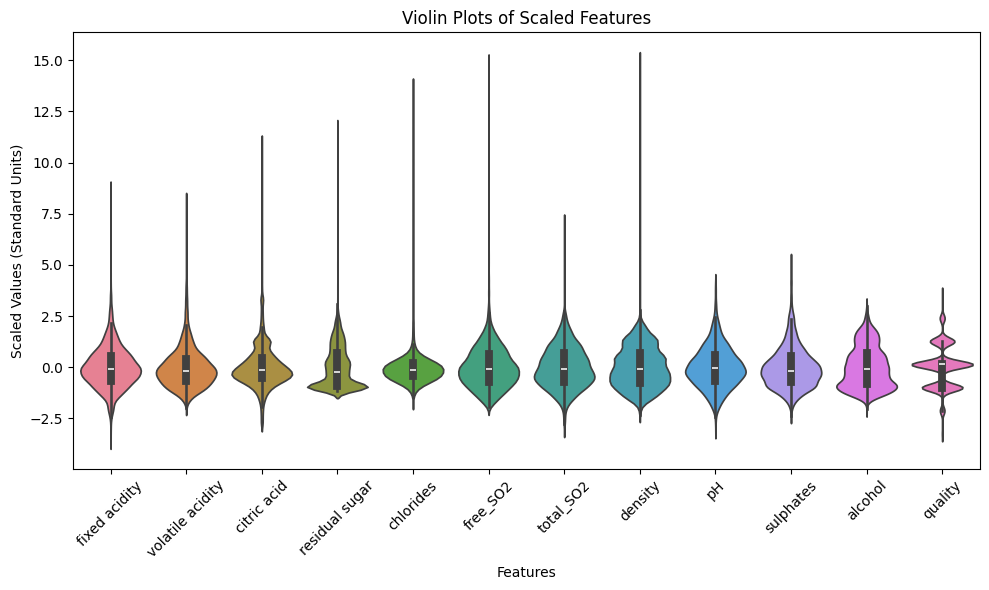

In [58]:
#Task4

#preprocessing to ensure that each plot is visible.
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(whitewine_df)
scaled_df = pd.DataFrame(scaled_data, columns=whitewine_df.columns)
scaled_df.head(5)

#plotting
plt.figure(figsize=(10, 6))

sns.violinplot(data=scaled_df)
plt.title('Violin Plots of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values (Standard Units)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('quality_distribution.png')
plt.show('Violin Plots of Scaled Features')

#Task 5
Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

b0 = 2.594634883462978
b1 = 0.3118068153786768
RMSE: 0.7859719307331404
R²: 0.20235854927544705


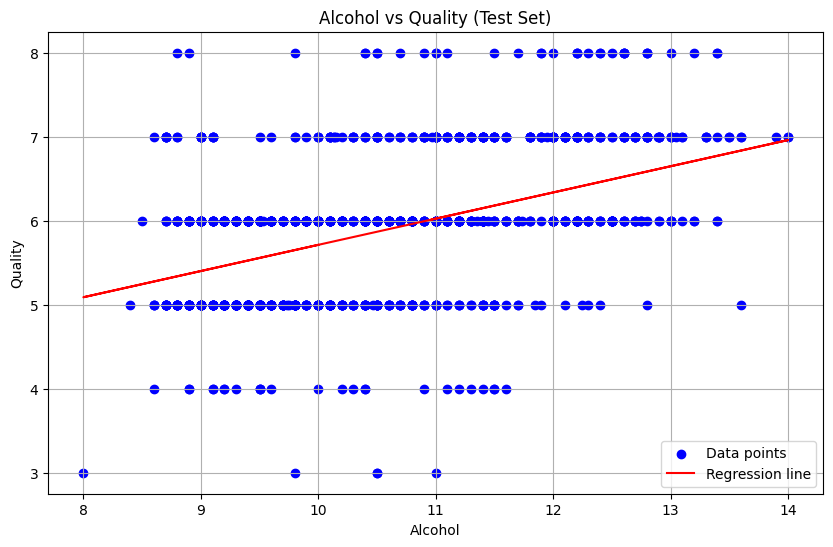

In [83]:
#Task 5

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X=whitewine_df[['alcohol']]
y=whitewine_df['quality']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training
model=LinearRegression()
model.fit(X_train, y_train)

#coefficient and intercept
b0=model.intercept_
b1 =model.coef_[0]

print(f'b0= {model.intercept_}')
print(f'b1= {model.coef_[0]}')

#Making predictions on the test data
y_pred=model.predict(X_test)

#RMSE and R2
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2= r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

#Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('Alcohol vs Quality (Test Set)')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.grid(True)
plt.savefig('regression_plot_task5.png')
plt.show()


#Task6:Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.

Intercept (b0): -37.49257502316353
Coefficients (b1): {'volatile acidity': -2.128325298480065, 'alcohol': 0.39908482916666943, 'density': 40.00172502326192}
RMSE: 0.7652181198384326
R²: 0.24392629832553359


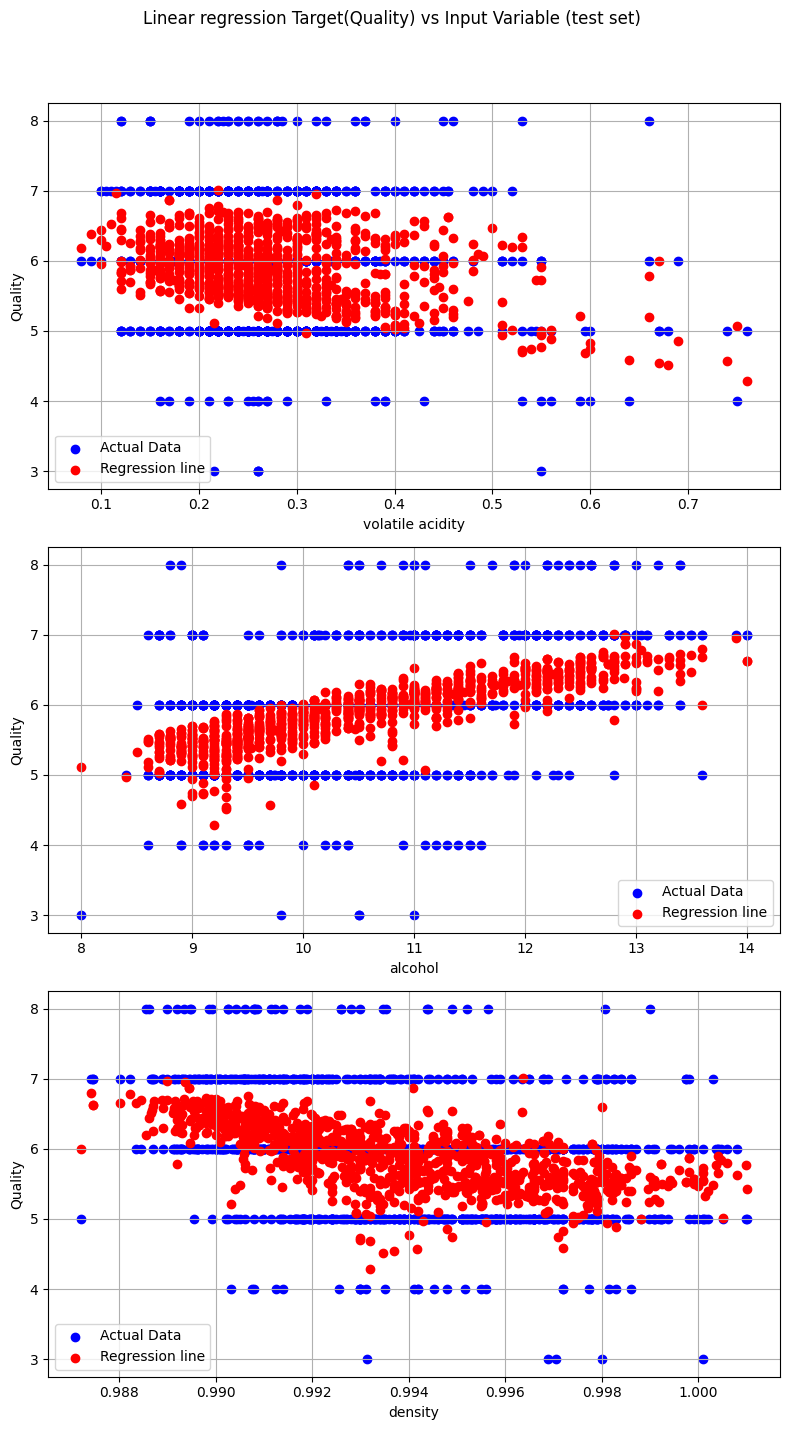

In [91]:
A =whitewine_df[['volatile acidity', 'alcohol', 'density']]
B =whitewine_df['quality']

#Splitting the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

#training
model= LinearRegression()
model.fit(A_train, B_train)

#coefficient and intercept
b0= model.intercept_
coefficients= model.coef_

print(f'Intercept (b0): {b0}')
#print(f'b1= {model.coef_}')
print('Coefficients (b1):', dict(zip(A.columns, coefficients)))

#Making predictions on the test data
B_pred = model.predict(A_test)

#RMSE and R2
rmse = np.sqrt(mean_squared_error(B_test, B_pred))
r2= r2_score(B_test, B_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

#Plotting
fig, axes= plt.subplots(nrows=3, ncols=1, figsize=(8, 15))
fig.suptitle('Linear regression Target(Quality) vs Input Variable')

for i, col in enumerate(['volatile acidity', 'alcohol', 'density']):
  axes[i].scatter(A_test[col], B_test, color='blue', label='Actual Data', alpha=1)
  axes[i].scatter(A_test[col], B_pred, color='red', label='Regression line', alpha=1)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Quality')
  axes[i].legend()
  axes[i].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('regression_plot_task6.png')
plt.show()